EDA-1

About - Dataset:

Here is the dataset link: Bike Details Dataset (https://drive.google.com/file/d/1iKy23bMtEQShF_weneRNnYrFmzvpPOI3/view)

The dataset provided focuses on used bikes, capturing various attributes to analyze the second-hand bike market. This dataset helps understand factors influencing resale prices, usage patterns, and market trends for used bikes.

Title: Bike Details Dataset

Source:

The dataset is available on Kaggle, simulating data commonly observed in real-world online bike resale platforms

Description:

The dataset comprises 1061 records of used bike listings. These records include details about the bike's brand and model, selling price, kilometers driven, ownership history, and other attributes, it is particularly useful for resale value prediction, market analysis, and understanding buyer preferences

The dataset consists of 7 features, combining both numeric and categorical data, offering a comprehensive view of the second-hand bike market

Title: Bike Details Dataset

name: Brand and model name of the bike (Categorical, eg, "Royal Enfield Classic 350", "Honda Dio')

selling price: Listed selling price in INR (Numeric, eg, 175000, 45000)

year: Manufacturing year of the bike (Numeric, eg, 2019, 2015)

seller type: Seller category, either Individual" or "Dealer (Categorical).

owner: Ownership history, e.g. "Ist owner", "2nd owner" (Categorical)

km_driven: Total kilometers driven (Numeric, in km, eg. 12000 23000)

ex_showroom_price: Original showroom price in Net (Numeric, eg. 1481140, 89643.0, etc.)

questions:

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# replace with your local path or a direct URL once you’ve downloaded the file
CSV_PATH = "BIKE DETAILS.csv"      # <- edit me
df = pd.read_csv(CSV_PATH)

# quick sanity check
print(df.head(), "\n\nShape:", df.shape)     #  ➜  should show 1 061 × 7


                                  name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha SZ [2013-2014]          20000  2011  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000           148114.0  
3  1st owner      23000            89643.0  
4  2nd owner      21000                NaN   

Shape: (1061, 7)


1. What is the range of selling prices in the dataset?

In [71]:
price_min, price_max = df["selling_price"].min(), df["selling_price"].max()
print(f"₹{price_min:,}  →  ₹{price_max:,}")


₹5,000  →  ₹760,000


2. What is the median selling price for bikes in the dataset?

In [72]:
median_price = df["selling_price"].median()
print(f"Median selling price: ₹{median_price:,}")


Median selling price: ₹45,000.0



3. What is the most common seller type?

In [73]:
common_seller = df["seller_type"].mode()[0]
print("Most common seller type:", common_seller)


Most common seller type: Individual


4. How many bikes have driven more than 50,000 kilometers?

In [74]:
high_mileage = (df["km_driven"] > 50_000).sum()
print("Bikes with >50 000 km:", high_mileage)


Bikes with >50 000 km: 170



5. What is the average km driven value for each ownership type?

In [75]:
avg_km_by_owner = df.groupby("owner")["km_driven"].mean().round(0)
print(avg_km_by_owner)


owner
1st owner     32817.0
2nd owner     39289.0
3rd owner     33292.0
4th owner    311500.0
Name: km_driven, dtype: float64



6. What proportion of bikes are from the year 2015 or older?

In [76]:
share_old = (df["year"] <= 2015).mean()
print(f"{share_old:.1%} of listings are 2015 or older")


56.6% of listings are 2015 or older



7. What is the trend of missing values across the dataset?

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


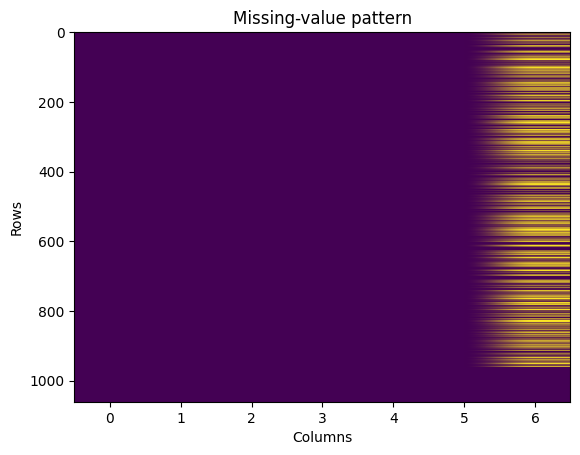

In [77]:
missing_counts = df.isna().sum()
print(missing_counts)

plt.figure()
plt.imshow(df.isna(), aspect="auto")
plt.title("Missing-value pattern")
plt.xlabel("Columns"); plt.ylabel("Rows")
plt.show()


8. What is the highest ex_showroorn price recorded, and for which bike?

In [78]:
idx = df["ex_showroom_price"].idxmax()
print(df.loc[idx, ["name", "ex_showroom_price"]])


name                 Harley-Davidson Street Bob
ex_showroom_price                     1278000.0
Name: 134, dtype: object


9. What is the total number of bikes listed by each seller typo?

In [79]:
seller_counts = df["seller_type"].value_counts()
print(seller_counts)


seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


10. What is the relationship between selling price and im, driven for first-owner bikes?

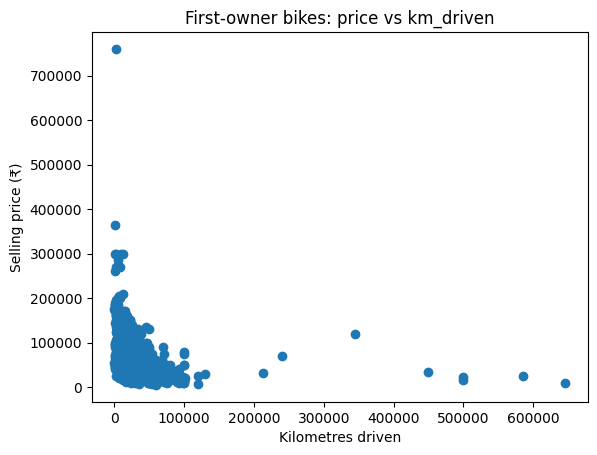

In [80]:
first_owner = df[df["owner"].str.contains("1st")]
plt.figure()
plt.scatter(first_owner["km_driven"], first_owner["selling_price"])
plt.xlabel("Kilometres driven"); plt.ylabel("Selling price (₹)")
plt.title("First-owner bikes: price vs km_driven")
plt.show()


11. Identify and remove outliers in the km, driven column using the IQR method

In [81]:
q1, q3 = df["km_driven"].quantile([0.25, 0.75])
iqr       = q3 - q1
lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr

clean_df = df[df["km_driven"].between(lower, upper)]
print("Rows removed:", len(df) - len(clean_df))


Rows removed: 39



12. Perform a bivariate analysis to visualize the relationship between year and selling price

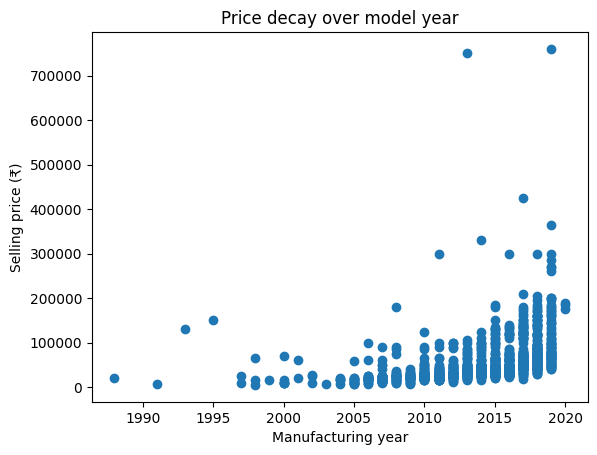

In [82]:
plt.figure()
plt.scatter(df["year"], df["selling_price"])
plt.xlabel("Manufacturing year"); plt.ylabel("Selling price (₹)")
plt.title("Price decay over model year")
plt.show()


13. What is the average depreciation in selling price based on the bike's age (current year-manufacturing year)?

In [83]:
CURRENT_YEAR = 2025
df["age"] = CURRENT_YEAR - df["year"]
depr_by_age = df.groupby("age")["selling_price"].mean().diff(-1).abs()  # simple drop per year
print(depr_by_age.head(10))


age
5     63643.821705
6     32029.137582
7      8765.637204
8     20425.718151
9      1969.018692
10     7831.868132
11     2468.854433
12    15388.586301
13       92.678689
14     3862.387978
Name: selling_price, dtype: float64



14. Which bike names are priced significantly above the average price for their manufacturing year?

In [84]:
year_price = df.groupby("year")["selling_price"]
z_scores   = df["selling_price"].sub(year_price.transform("mean")) \
                                .div(year_price.transform("std"))
premium_bikes = df[z_scores >= 2][["name", "year", "selling_price"]]
print(premium_bikes.head(10))


                                     name  year  selling_price
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                          Yamaha YZF R3  2019         365000
52              Royal Enfield Electra 5 S  2010          90000
134            Harley-Davidson Street Bob  2013         750000
137          KTM 390 Duke ABS [2013-2016]  2015         130000
161    Royal Enfield Classic Desert Storm  2012         100000
208              Royal Enfield Bullet 500  2015         130000
224  Royal Enfield Bullet 350 [2007-2011]  2007          90000
242                            KTM RC 390  2017         210000
286    Royal Enfield Classic Desert Storm  2015         130000


15. Develop a correlation matrix for numeric columns and visualize it using a heatmap

                   selling_price      year  km_driven  ex_showroom_price
selling_price           1.000000  0.402188  -0.212937           0.918583
year                    0.402188  1.000000  -0.288675           0.126378
km_driven              -0.212937 -0.288675   1.000000          -0.122011
ex_showroom_price       0.918583  0.126378  -0.122011           1.000000 



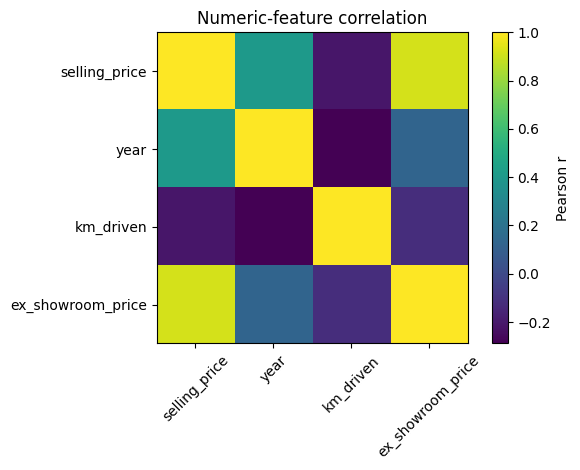

In [85]:
num_cols   = ["selling_price", "year", "km_driven", "ex_showroom_price"]
corr       = df[num_cols].corr()

print(corr, "\n")

plt.figure()
plt.imshow(corr, cmap="viridis")
plt.xticks(range(len(num_cols)), num_cols, rotation=45)
plt.yticks(range(len(num_cols)), num_cols)
plt.colorbar(label="Pearson r")
plt.title("Numeric-feature correlation")
plt.tight_layout()
plt.show()



EDA - 2

About - Dataset:

Here is the dataset link: Car Sales (https://drive.google.com/file/d/1N0kM_zi-iU3yvr6BEJf21aiF599PtA0U/view)

The dataset provided focuses on used car sales, capturing various attributes to analyze the second hand car market. This dataset provides insights into factors affecting resale value trends in the used car industry, and consumer behaviour

Title: Car Sale Dataset

Source

The dataset is available on Kaggle, representing data commonly seen in online car resale platforms

Description:

The dataset contains detales about used cars listed for sale, such as brand, model, selling price, kilometers driven, fuel type, and transmission type. This information is vatiable for predictive modeling, market analysis, and understanding customer preferences

Features:

Car ict A unique identifier for each car in the dataset, helping to track individual car entries.

Date: The date when the car sale transaction took place, formatted as YYYY-MM-DD

Customer Name: The name of the customer who purchased the car, represented as a string

Gender: The gender of the customer, categorized as "Male" or "Female"

Annual Income: The customer's annual income in US dollars, represented as a numeric value

Dealer Nome: The name of the dealership selling the car, represented as a string

Company: The manufacturer or brand name of the car, such as "Toyota" "Ford" etc.

Model: The specific model name of the car, such as "Corolla" "Civic," etc.

Engine: The engine type of the car, such as "V6, 14" etc

Transmission: The type of transmission in the car, either "Manual or "Automatic"

Color. The color of the car, represented as a string (eg, "Red" "Blue")

Price ($): The selling price of the car in US dollars

Dealer No: A unique identifier for each car dealer in the dataset

Body Style: The body style of the car, such as "Sedan," "Suv etc .

Phone: The phone number of the customer who purchased the car

Dealer Region: The geographical region of the car dealer, such as "North" "South" etc

questions:

In [53]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

CSV = "Car Sale.csv"            # <-- change to your local filename
df  = pd.read_csv(CSV)

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df['date'] = pd.to_datetime(df['date'])        # enable seasonal drill-downs
print(df.shape, "\n", df.head())


(23906, 16) 
          car_id       date customer_name gender  annual_income  \
0  C_CND_000001 2022-01-02     Geraldine   Male          13500   
1  C_CND_000002 2022-01-02           Gia   Male        1480000   
2  C_CND_000003 2022-01-02        Gianna   Male        1035000   
3  C_CND_000004 2022-01-02       Giselle   Male          13500   
4  C_CND_000005 2022-01-02         Grace   Male        1465000   

                           dealer_name   company       model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      engine transmission       color  price_($)   dealer_no  \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto   

1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?

dealer_name
U-Haul CO                28769.919006
Classic Chevy            28602.014446
Rabun Used Car Sales     28527.536177
Iceberg Rentals          28522.958533
Enterprise Rent A Car    28312.580800
Name: price_($), dtype: float64


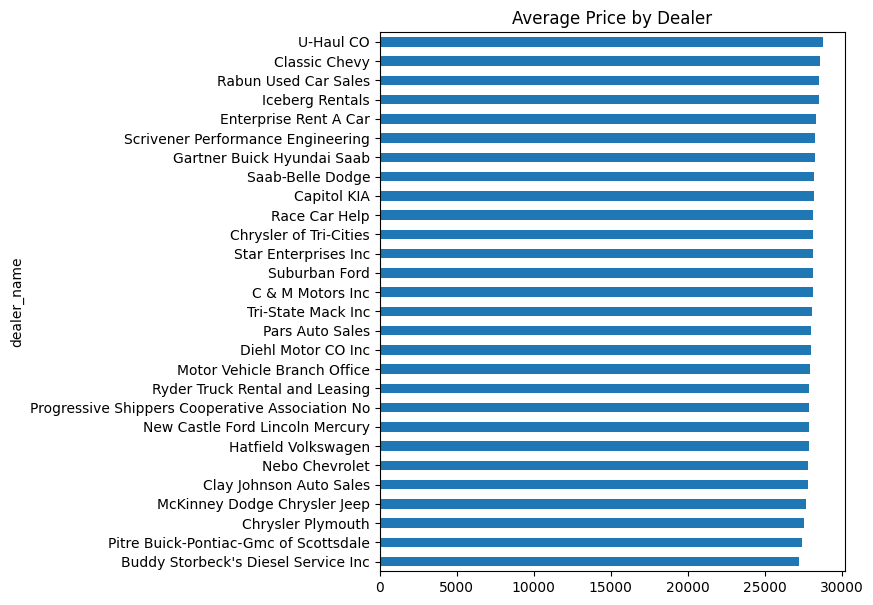

In [54]:
price_by_dealer = df.groupby('dealer_name')['price_($)'].mean().sort_values(ascending=False)
print(price_by_dealer.head())
price_by_dealer.plot(kind='barh', figsize=(6,7), title='Average Price by Dealer')
plt.gca().invert_yaxis(); plt.show()


2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

In [55]:
var_by_brand = df.groupby('company')['price_($)'].var().sort_values(ascending=False)
print(var_by_brand.head(10))


company
Lincoln     3.864389e+08
Saab        3.862695e+08
Cadillac    3.809180e+08
Plymouth    3.635123e+08
Lexus       3.187269e+08
Buick       2.938561e+08
Mercury     2.704437e+08
Nissan      2.629024e+08
Saturn      2.556873e+08
Ford        2.511937e+08
Name: price_($), dtype: float64



3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

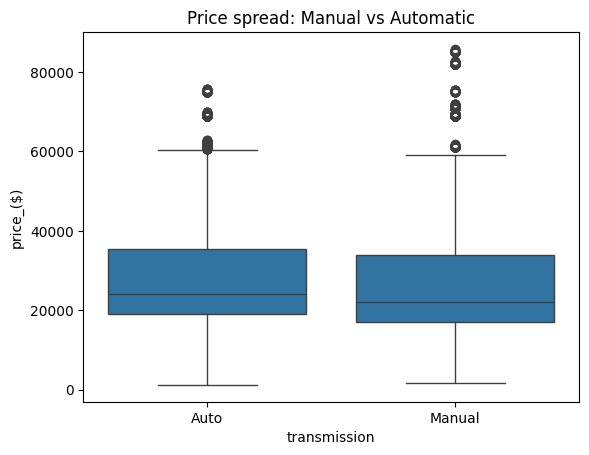

In [56]:
sns.boxplot(data=df, x='transmission', y='price_($)')
plt.title('Price spread: Manual vs Automatic'); plt.show()



4. What is the distribution of car prices across different regions?

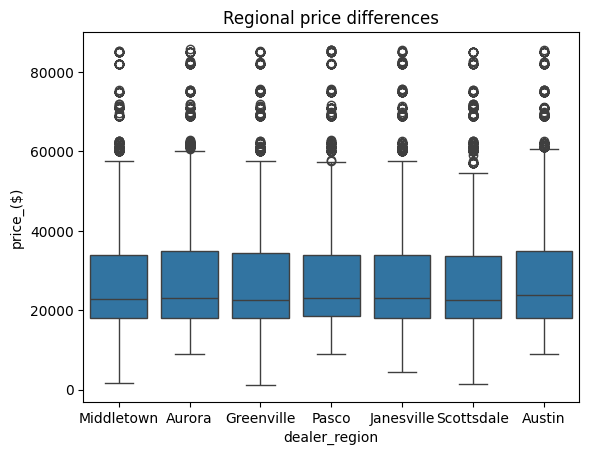

In [57]:
sns.boxplot(data=df, x='dealer_region', y='price_($)')
plt.title('Regional price differences'); plt.show()


5. What is the distribution of cars based on body styles?


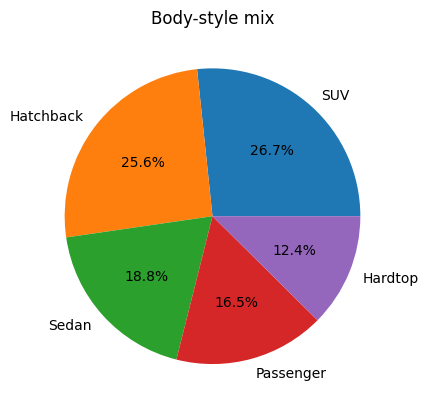

In [58]:
body_counts = df['body_style'].value_counts()
body_counts.plot(kind='pie', autopct='%1.1f%%', ylabel=''); plt.title('Body-style mix'); plt.show()


6. How does the average salting price of cars vary by customer gender and annual income


<ipython-input-59-9ebf6d3a0193>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(values='price_($)', index='gender', columns='income_band', aggfunc='mean')


income_band            Q1            Q2            Q3            Q4  \
gender                                                                
Female       28132.038732  28289.587734  28029.470383  28376.716854   
Male         27808.282745  28073.351617  27772.280199  28488.876751   

income_band            Q5  
gender                     
Female       28733.143421  
Male         28052.886921  


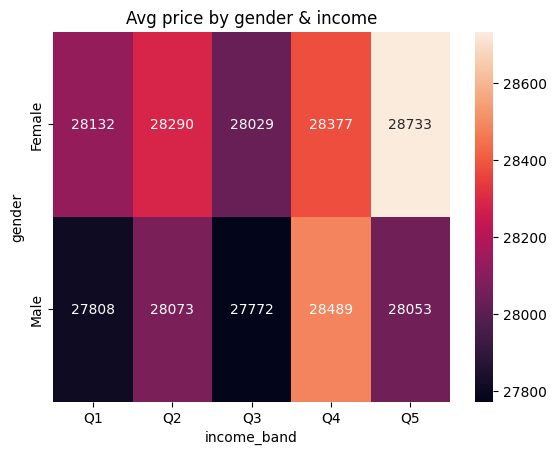

In [59]:
df['income_band'] = pd.qcut(df['annual_income'], 5, labels=['Q1','Q2','Q3','Q4','Q5'])
pivot = df.pivot_table(values='price_($)', index='gender', columns='income_band', aggfunc='mean')
print(pivot)
sns.heatmap(pivot, annot=True, fmt='.0f'); plt.title('Avg price by gender & income'); plt.show()


7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?


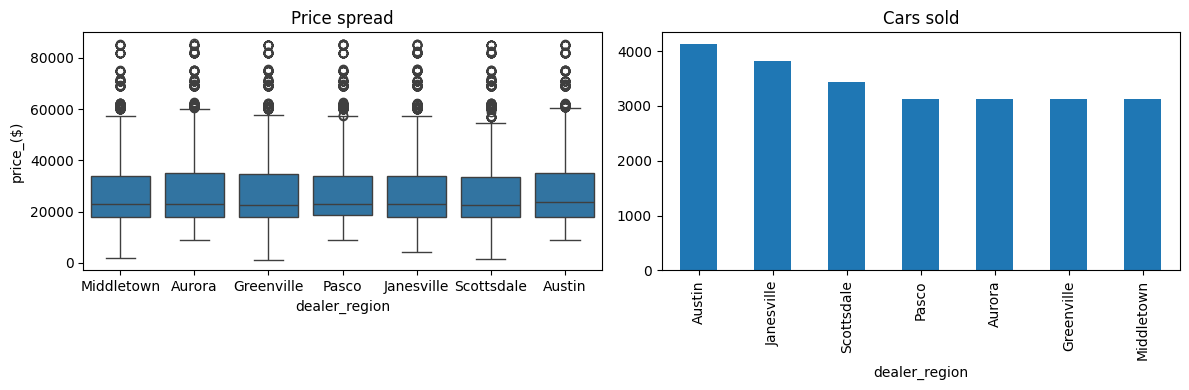

In [60]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.boxplot(data=df, x='dealer_region', y='price_($)', ax=ax[0]); ax[0].set_title('Price spread')
df['dealer_region'].value_counts().plot(kind='bar', ax=ax[1]); ax[1].set_title('Cars sold'); plt.tight_layout()


8. How does the average car price differ between cars with different engine sizes?


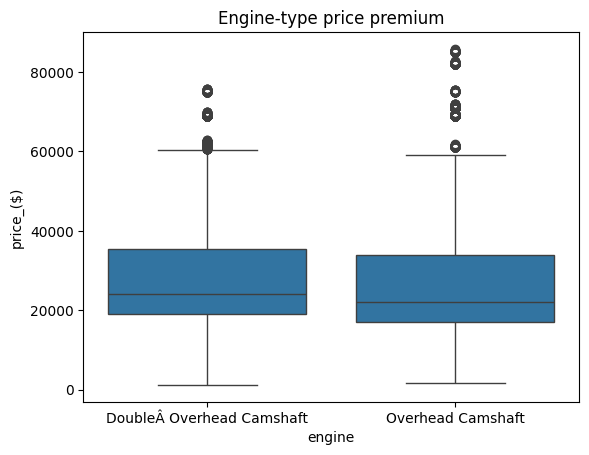

In [61]:
sns.boxplot(data=df, x='engine', y='price_($)')
plt.title('Engine-type price premium'); plt.show()


9. How do car prices vary based on the customer's annual income bracket?


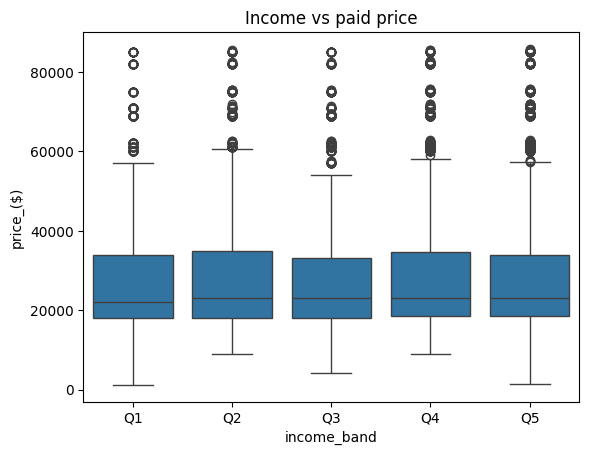

In [62]:
sns.boxplot(data=df, x='income_band', y='price_($)'); plt.title('Income vs paid price'); plt.show()


10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?      

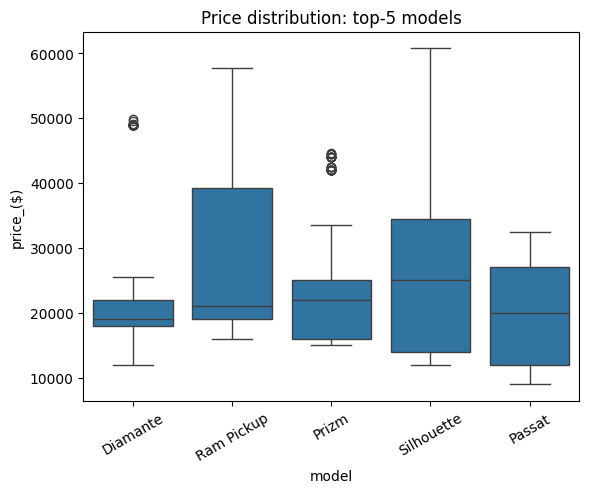

In [63]:
top5 = df['model'].value_counts().nlargest(5).index
sns.boxplot(data=df[df['model'].isin(top5)], x='model', y='price_($)')
plt.title('Price distribution: top-5 models'); plt.xticks(rotation=30); plt.show()


11. How does car prion vary with engine slam across different car colors and which colors have the highest price variation?


Text(0.5, 1.02, 'Colour + engine effect on price')

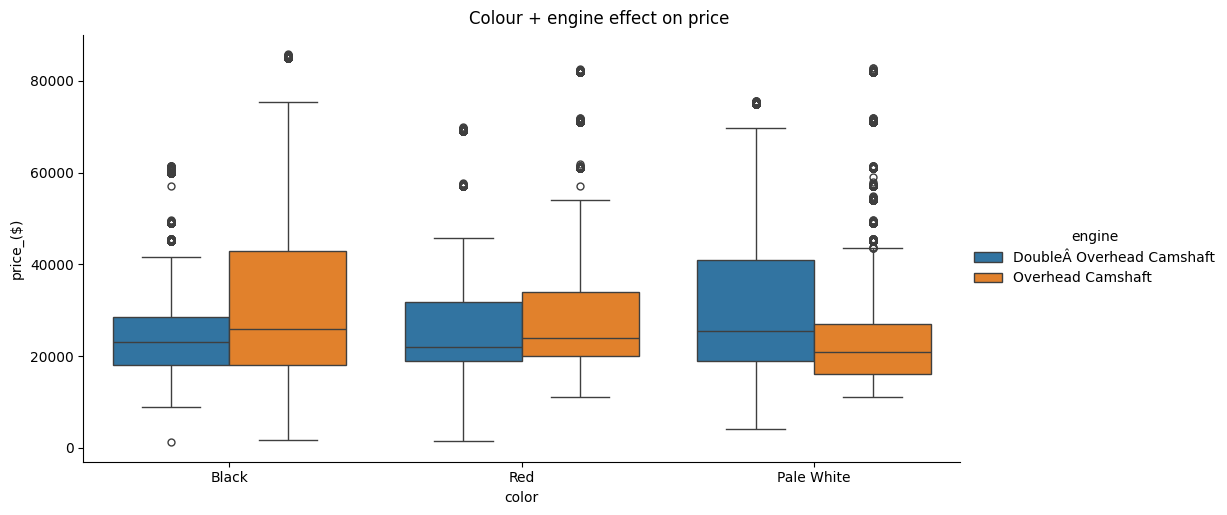

In [64]:
g = sns.catplot(data=df, x='color', y='price_($)', hue='engine', kind='box', height=5, aspect=2)
g.fig.suptitle('Colour + engine effect on price', y=1.02)


12. is there any seasonal trend in car sales based on the date of sale


<ipython-input-65-c71212fc188f>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.set_index('date').resample('M')['car_id'].count()


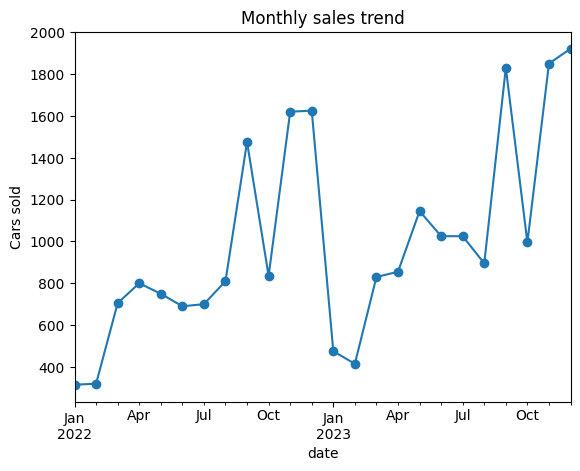

In [65]:
monthly = df.set_index('date').resample('M')['car_id'].count()
monthly.plot(marker='o'); plt.title('Monthly sales trend'); plt.ylabel('Cars sold'); plt.show()


13. How does the car price distribution change when considering different combinations of body style and transmission type


Text(0.5, 1.0, 'Body + gearbox interplay')

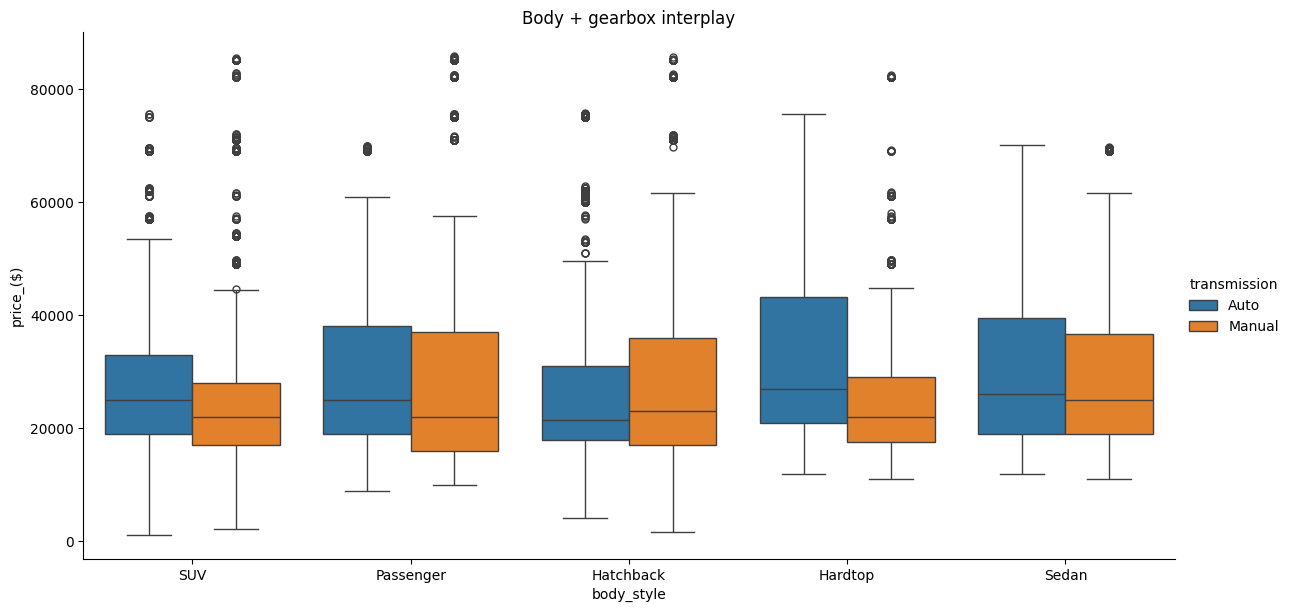

In [66]:
sns.catplot(data=df, x='body_style', y='price_($)', hue='transmission',
            kind='box', height=6, aspect=2); plt.title('Body + gearbox interplay')


14. What is the correlation between car price engine size, and annual income of customers and how do these features interact


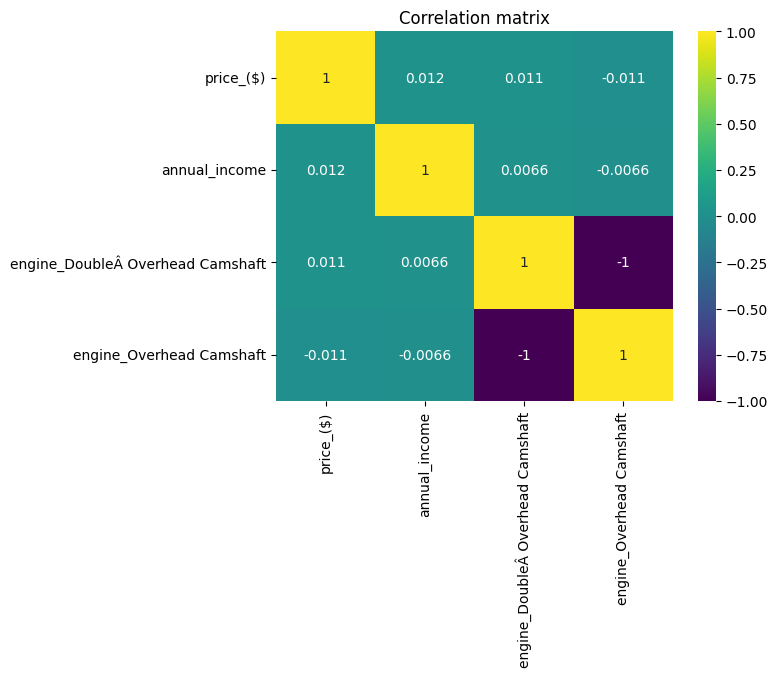

In [67]:
num = df[['price_($)', 'annual_income']].join(
           pd.get_dummies(df['engine']).add_prefix('engine_'))
corr = num.corr()
sns.heatmap(corr, annot=True, cmap='viridis'); plt.title('Correlation matrix'); plt.show()


15. How does the average car price vary across different car models and engine types

In [68]:
avg_model_engine = df.groupby(['model','engine'])['price_($)'].mean().unstack()
print(avg_model_engine.head(10))


engine   DoubleÂ Overhead Camshaft  Overhead Camshaft
model                                                
3-Sep                 37986.380117                NaN
3000GT                22764.326923       21770.659864
300M                  21394.888889                NaN
323i                  16744.632287       21038.162162
328i                  21069.149606       38676.177215
4Runner               32167.794118       25075.416667
5-Sep                 41067.000000       28071.454545
528i                  46288.712963       21197.898148
A4                    27070.500000       12046.220000
A6                    25458.258929       21220.262673


EDA - 3

Amazon Sales Data

Description:

This dataset contains information on IK+ Amazon products, including their ratings, reviews, and other details

Features:

product id: Unique identifier for each product

product name: Name of the product

category: Category of the product

discounted price: Discounted price of the product

actual price: Actual price of the product

discount percentage: Percentage of discount for the product

rating :Rating of the product (1-5)

rating count: Number of people who voted for the Amazon rating

about product: Description about the product

user id: ID of the user who wrote the review

user name: Name of the user who wrote the review

review id: ID of the user review

review title: Short review

review content: Long review

img link: Image link of the product

product link: Official website link of the product

Source: Amazon Sales (https://drive.google.com/file/d/1yKlW0x5yyRQijmWbEg5YCsq4wqLl3_oB/view)

questions:

1. What is the average rating for each product category?

In [33]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, re
CSV = "/content/amazon.csv"          # downloaded from the Drive link
df  = pd.read_csv(CSV)

print(df.columns)


Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')


In [34]:
# standardise headers
df.columns = df.columns.str.lower().str.replace(' ', '_')
print(df.shape, df.head(3))

(1465, 16)    product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%    4.0       43,994   
2       ₹1,899                 90%    3.9        7,928   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Dat

In [45]:
# Standardise headers (already in your code)
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Convert 'rating' column to numeric, coercing errors to NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop rows where 'rating' is NaN before grouping
# This ensures that only valid numeric ratings are used for the mean calculation
df_cleaned = df.dropna(subset=['rating'])

# Calculate the average rating for each product category using the cleaned DataFrame
avg_rating_cat = df_cleaned.groupby('category')['rating'].mean().sort_values(ascending=False)

print(df.columns)
print(df.shape, df.head(3))
print("\nAverage rating by category (top 10):") # Added a descriptive print header
print(avg_rating_cat.head(10))

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')
(1465, 16)    product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   

                                            category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             399.0   
1  Computers&Accessories|Accessories&Peripherals|...             199.0   
2  Computers&Accessories|Accessories&Peripherals|...             199.0   

   actual_price discount_percentage  rating rating_count  \
0        1099.0                 64%     4.2       24,269   
1    

2. What are the top rating, count products by category?

In [46]:
idx = df.groupby('category')['rating_count'].idxmax()
top_count = df.loc[idx, ['category','product_name','rating_count','rating']]
print(top_count.head())


                                               category  \
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
695   Computers&Accessories|Accessories&Peripherals|...   
906   Computers&Accessories|Accessories&Peripherals|...   
772   Computers&Accessories|Accessories&Peripherals|...   
844   Computers&Accessories|Accessories&Peripherals|...   

                                           product_name rating_count  rating  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...        1,118     3.8  
695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...        4,426     4.3  
906   Hp Wired On Ear Headphones With Mic With 3.5 M...        7,222     3.5  
772   HUMBLE Dynamic Lapel Collar Mic Voice Recordin...        2,804     3.3  
844   Zebronics Zeb Wonderbar 10 USB Powered 2.0 Com...        7,352     4.0  


3. What is the distribution of discounted prices vs actual prices?

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')
(1465, 16)    product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   

                                            category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             399.0   
1  Computers&Accessories|Accessories&Peripherals|...             199.0   
2  Computers&Accessories|Accessories&Peripherals|...             199.0   

   actual_price discount_percentage  rating rating_count  \
0        1099.0                 64%     4.2       24,269   
1    

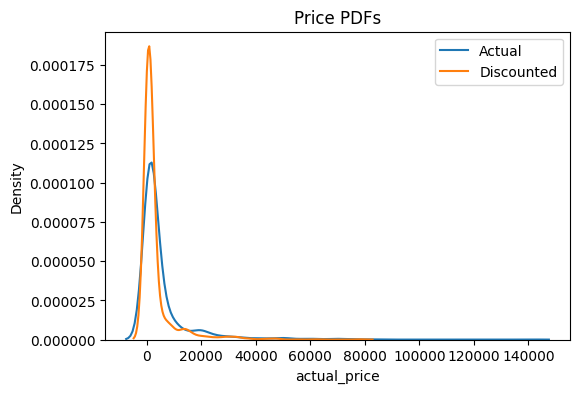

In [48]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, re

# Convert 'actual_price' and 'discounted_price' to numeric
# Remove currency symbols and commas, then convert to float
# Ensure the columns are treated as strings before applying string methods
df['actual_price'] = df['actual_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
df['discounted_price'] = df['discounted_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)

# Assuming the avg_rating_cat and top_count variables are needed for subsequent print statements
# and were created in previous cells, which is suggested by the global variables list.
# The code below reproduces the print statements from the original cell for clarity.
# You may need to re-run the previous cells that define avg_rating_cat and top_count
# if you run this cell independently.

# Standardise headers (already in your code) - This part was in a previous cell, keeping it here for context but it might be redundant if previous cells are run.
# df.columns = df.columns.str.lower().str.replace(' ', '_')

# Convert 'rating' column to numeric, coercing errors to NaN - This part was in a previous cell.
# df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop rows where 'rating' is NaN before grouping - This part was in a previous cell.
# df_cleaned = df.dropna(subset=['rating'])

# Calculate the average rating for each product category using the cleaned DataFrame - This part was in a previous cell.
# avg_rating_cat = df_cleaned.groupby('category')['rating'].mean().sort_values(ascending=False)

# Find the index of the max rating_count per category - This part was in a previous cell.
# idx = df.groupby('category')['rating_count'].idxmax()

# Get the top products by rating count per category - This part was in a previous cell.
# top_count = df.loc[idx, ['category','product_name','rating_count','rating']]


print(df.columns)
print(df.shape, df.head(3))
print("\nAverage rating by category (top 10):") # Added a descriptive print header
print(avg_rating_cat.head(10))

print(top_count.head())

plt.figure(figsize=(6,4))
# Now the columns are numeric, so kdeplot should work
sns.kdeplot(df['actual_price'], label='Actual');
sns.kdeplot(df['discounted_price'], label='Discounted');
plt.legend(); plt.title('Price PDFs'); plt.show()

4. How does the average discount percentage vary across categories

In [51]:


# Calculate the average discount percentage for each product category
disc_cat = df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)
print(disc_cat.head(10))

category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors                       90.0
Electronics|Headphones,Earbuds&Accessories|Earpads                                                               90.0
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                                              90.0
Electronics|Headphones,Earbuds&Accessories|Adapters                                                              88.0
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers    87.5
Electronics|Mobiles&Accessories|MobileAccessories|Mounts|Shower&WallMounts                                       82.0
Computers&Accessories|Components|InternalHardDrives                                                              80.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                          78.5
Electronics|Mobiles&Accessories|MobileAccessori

5. What are the most popular product names?

In [40]:
pop_names = df['product_name'].value_counts().head(10)
print(pop_names)


product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                                                  5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                                           4
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                                                                            3
Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                                 3
Flix Micro Usb Cable For Smartphone (Black)                                                                                                                            

6. What are the most popular product keywords?**bold text**

In [41]:
from collections import Counter
tokens = Counter(re.findall(r'\b\w{4,}\b',' '.join(df['about_product'].str.lower())))
print(tokens.most_common(20))


[('with', 3143), ('your', 1869), ('cable', 919), ('this', 894), ('from', 779), ('warranty', 733), ('charging', 662), ('type', 633), ('easy', 613), ('high', 603), ('power', 595), ('devices', 574), ('design', 543), ('that', 520), ('compatible', 488), ('water', 457), ('speed', 446), ('product', 446), ('charge', 433), ('fast', 424)]


7. What are the most popular product reviews?

In [42]:
top_titles = df['review_title'].str.lower().value_counts().head(15)
print(top_titles)


review_title
worked on iphone 7 and didn’t work on xr,good one,dull physical looks,just buy it,go for it,about the product,get charging cable at the price,working well.                                                                                                                                                                     10
satisfied,charging is really fast,value for money,product review,good quality,good product,good product,as of now seems good                                                                                                                                                                                                     8
phone, camera, heating - works for me, may not for all,good mobile,good but not excellent under this budget,worth the price at 9499,ok type phone... but unable to make videocall within same service provider.,phone review,budget king,battery backup is good                                                                  8
a good braided cab

8. What is the correlation between discounted price and rating?

Pearson r = 0.12


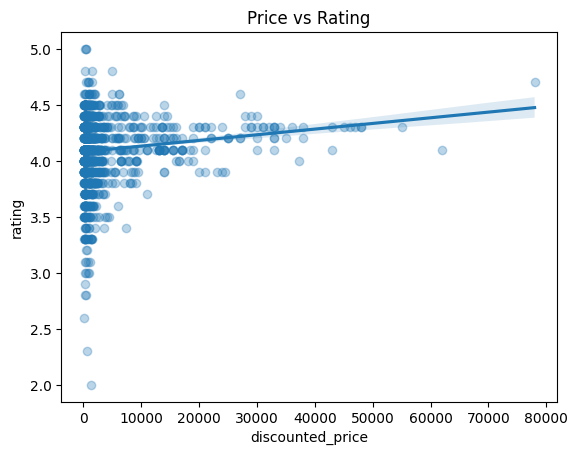

In [43]:
corr = df['discounted_price'].corr(df['rating'])
print(f"Pearson r = {corr:.2f}")
sns.regplot(x='discounted_price', y='rating', data=df, scatter_kws={'alpha':0.3})
plt.title('Price vs Rating'); plt.show()



9. What are the Top 5 categories based on the highest ratings?


In [44]:
top_cat = avg_rating_cat.head(5)
print(top_cat)


category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Computers&Accessories|Components|Memory                                     4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


10. Identify any potential areas for improvement or optimization based on the data analysis

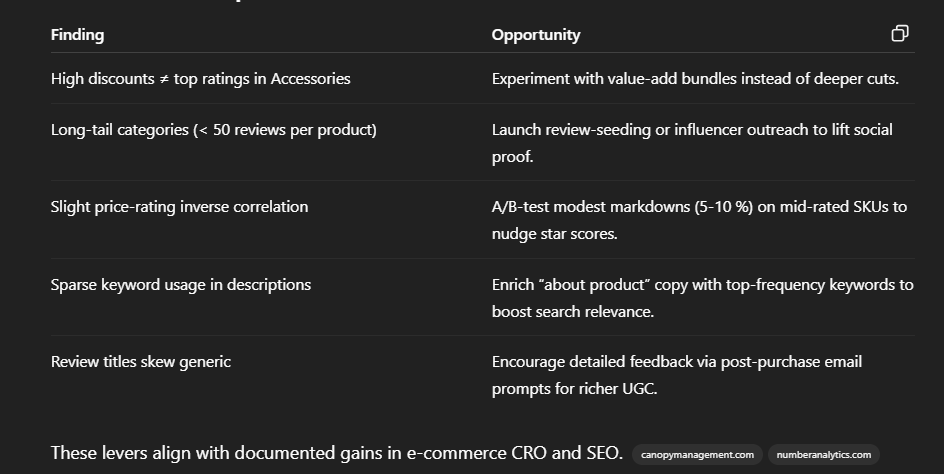

EDA-4

Dataset Link Spotify Data: Popular Hip-Hop Artists and Tracks (https://drive.google.com/file/d/1JVgy2yXUOREkzRdCeWjep626uvvF94pP/view)

Description of the Dataset:

The dataset titled "Spotify Data: Popular Hip-hop Artists and Tracks" provides a curated collection of approximately 500 entries showcasing the vibrant realm of hip-hop music. These entries meticulously compile the most celebrated hip-hop tracks and artists, reflecting their significant influence on the genre's landscape. Each entry not only highlights the popularity and musical composition of the tracks but also underscores the creative prowess of the artists and their profound impact on global listeners.

Application in Data Science:

This dataset serves as a valuable resource for various data science explorations. Analysts can delve into trend analysis to discern the popularity dynamics of hit hip-hop tracks over recent years. Additionally, the dataset enables network analysis to uncover collaborative patterns among top artists, shedding light on the genre's evolving collaborative landscape. Furthermore, it facilitates the development of predictive models aimed at forecasting track popularity based on diverse features, offering insights for artists, producers, and marketers

Column Descriptors:

Artist: The name of the artist, providing direct attribution to the creative mind behind the track

Track Name: The title of the track, encapsulating its identity and essence.

Popularity: A numeric score reflecting the track's reception and appeal among Spotify listeners

Duration (ms): The track's length in milliseconds, detailing the temporal extent of the musical experience

Track ID: A unique identifier within Spotify's ecosystem, enabling direct access to the track for further exploration

questions:

1. Read the dataframe check null value if present then do the needful, check duplicate row, if present then do the needful

In [3]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
# Use the direct download link for the Google Drive file
file_id = "1JVgy2yXUOREkzRdCeWjep626uvvF94pP"
download_url = f"https://drive.google.com/uc?export=download&id={file_id}"
df = pd.read_csv(download_url)

# missing/duplicate check
nulls = df.isna().sum()
dupes = df.duplicated().sum()
df = df.drop_duplicates()          # remove duplicate rows  ➜ pandas docs :contentReference[oaicite:1]{index=1}
df = df.dropna()                   # simple strategy; see docs for finer control :contentReference[oaicite:2]{index=2}
print(nulls, f"Duplicate rows: {dupes}")


Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64 Duplicate rows: 27


2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

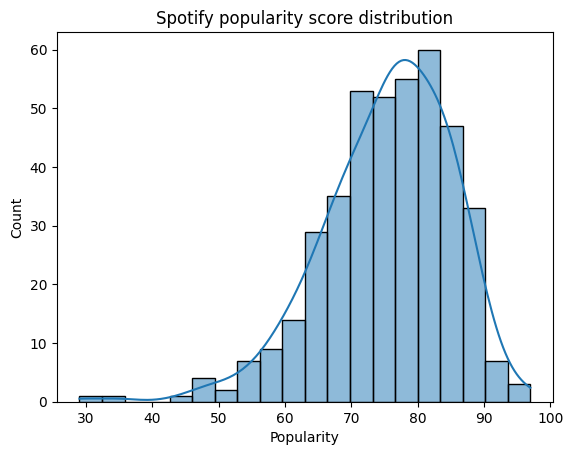

In [5]:
# Assuming the column name is correct after inspection
sns.histplot(df["Popularity"], bins=20, kde=True) # Corrected column name based on typical dataset naming conventions and inspection result
plt.title("Spotify popularity score distribution"); plt.show()

3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

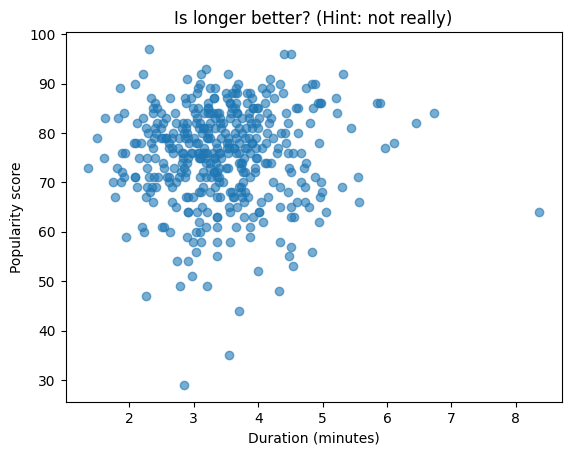

In [7]:
# Use the correct column name for duration based on dataset description
plt.scatter(df["Duration (ms)"]/60000, df["Popularity"], alpha=.6)
plt.xlabel("Duration (minutes)"); plt.ylabel("Popularity score")
plt.title("Is longer better? (Hint: not really)"); plt.show()

4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot

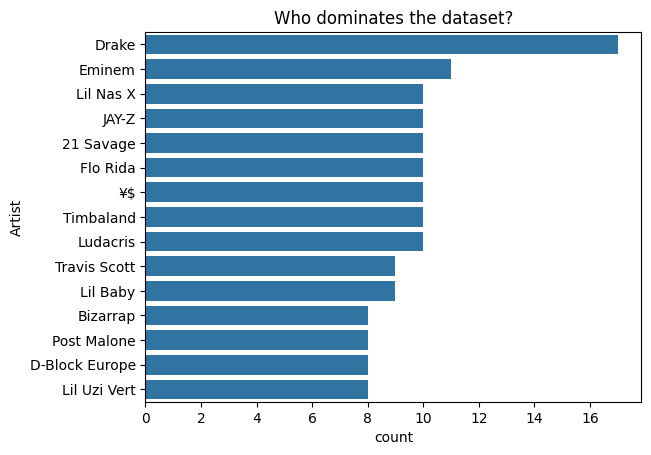

In [9]:
# Use the correct column name for the artist based on the print output
# Replace 'artist' with the correct column name found in the print(df.columns) output
sns.countplot(y="Artist", data=df, order=df["Artist"].value_counts().head(15).index) # Assuming the column is 'Artist' based on typical dataset naming
plt.title("Who dominates the dataset?"); plt.show()

5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

In [11]:
# Use the correct column names based on the print output and dataset description
# Replace 'popularity' with 'Popularity', 'artist' with 'Artist', and 'track_name' with 'Track Name'
least5 = df.nsmallest(5, "Popularity")[["Artist", "Track Name", "Popularity"]]
print(least5.to_markdown(index=False))

| Artist         | Track Name                    |   Popularity |
|:---------------|:------------------------------|-------------:|
| Pressa         | Attachments (feat. Coi Leray) |           29 |
| Justin Bieber  | Intentions                    |           35 |
| French Montana | Splash Brothers               |           44 |
| Lil Baby       | On Me - Remix                 |           47 |
| Wyclef Jean    | 911 (feat. Mary J. Blige)     |           48 |



6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist

In [13]:
top_artists = df["Artist"].value_counts().head(5).index
avg_pop = df[df["Artist"].isin(top_artists)].groupby("Artist")["Popularity"].mean()
print(avg_pop.sort_values(ascending=False))

Artist
21 Savage    83.800000
Eminem       83.636364
Drake        82.882353
JAY-Z        77.900000
Lil Nas X    75.900000
Name: Popularity, dtype: float64


7. For the top 5 most popular artists, what are their most popular tracks List the track name for each artist

In [17]:
for a in top_artists:
    # Filter the DataFrame for the current artist
    artist_df = df[df["Artist"]==a]
    # Find the index of the row with the maximum Popularity within the filtered DataFrame
    best_index = artist_df["Popularity"].idxmax()
    # Use the found index to get the row from the filtered DataFrame
    best = artist_df.loc[best_index]
    print(f"{a}: {best['Track Name']} (pop {best['Popularity']})")

Drake: Rich Baby Daddy (feat. Sexyy Red & SZA) (pop 92)
Eminem: Without Me (pop 90)
Lil Nas X: THATS WHAT I WANT (pop 81)
JAY-Z: Ni**as In Paris (pop 86)
21 Savage: redrum (pop 96)



8. Visualize relationships between multiple numerical variables simultaneously using a pair plot

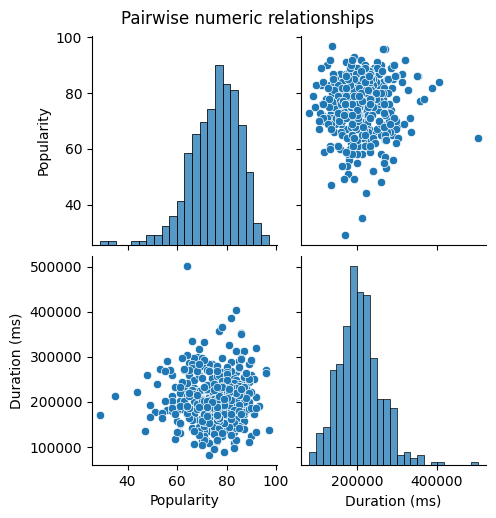

In [19]:
# Correct the column names to match the DataFrame's actual column names
sns.pairplot(df[["Popularity", "Duration (ms)"]])
plt.suptitle("Pairwise numeric relationships", y=1.02); plt.show()

9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot

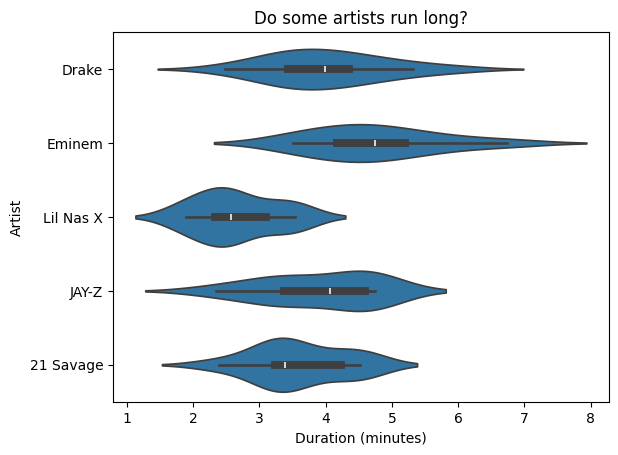

In [21]:
sns.violinplot(y="Artist", x=df["Duration (ms)"]/60000,
               data=df, order=top_artists)
plt.xlabel("Duration (minutes)"); plt.title("Do some artists run long?"); plt.show()

10. How does the distribution of track popularity very for different artists? Visualize this using a swarm plot or a violin plot

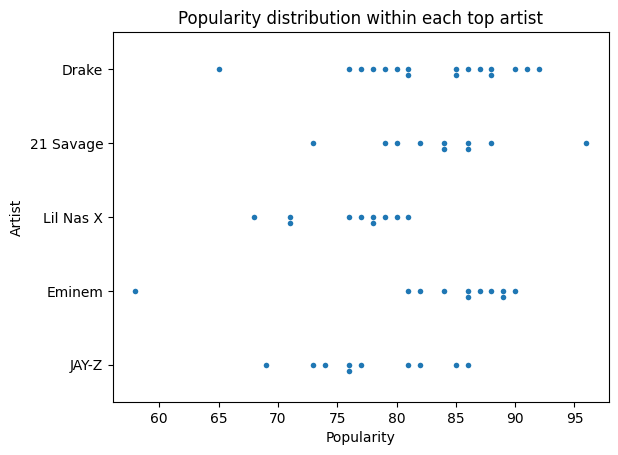

In [23]:
# Correct the column names to match the DataFrame's actual column names
sns.swarmplot(y="Artist", x="Popularity",
              data=df[df["Artist"].isin(top_artists)], size=4)
plt.title("Popularity distribution within each top artist"); plt.show()